# Kernel Derivatives: Regularization

Date: 4th December, 2017

In this notebook, I will be exploring how some different derivatives can be used as regularization parameters. This will be used in the context of Kernel Ridge Regression (KRR) and Gaussian Process Regression (GPR).

The general regression problem:

$$\mathcal{C} = \frac{1}{n} \sum \phi \left( y_i, f(x_i) \right) + \text{ penalty}(f)$$

where:

* $\phi$ is the estimation error 
* penalty($f$) is the regularization term.

Assume we have the following cost function for ridge regression where we have a regularization penalty (scaled by $\lambda$) added to the cost term like so ([1]):

$$\mathcal{C} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - f(x_i) \right)^2 + \lambda ||f||^{2}_{\mathcal{H}}$$

where:

* $\alpha$ are the weights
* $K$ is the kernel matrix
* $\lambda$ is the trade off parameter between the regularization and the mean squared error.
* $\Omega$ is the regularization that we choose (e.g. $||w||$, $||f||$, $||\partial f||$, $||\partial^2 f||$)

[1]: https://people.eecs.berkeley.edu/~bartlett/courses/281b-sp08/10.pdf

This results in the following formula:

$$\mathbf{w} = (\mathbf{x}^T\mathbf{x}+ \lambda \mathbf{I})^{-1} \mathbf{x}^T \mathbf{y}$$

## Derivation

##### Residual Sum of  Squares (RSS)
Cost function:

\begin{align}
\text{C}_{RS}\left(w, \lambda \right) &= ||y-Xw||^2 \\
\text{C}_{RSS}\left(w, \lambda \right) &= \left( y-Xw \right)^T \left( y-Xw \right) \\
\text{C}_{RSS}\left(w, \lambda \right) &= y^Ty - 2X^T w^T y + w^T \left( X^T X \right)w
\end{align}

Derivative of the cost function w.r.t. $w$:

\begin{align}
\frac{\partial \text{C}_{RSS}\left(w, \lambda \right)}{\partial w} &= - 2X^Ty + 2X^T Xw = 0 \\
\left( X^T Xw \right) &=  X^Ty \\
w &= \left( X^T X\right)^{-1} X^Ty
\end{align}

##### Ridge Regression (RR) - Penalized Sum of Squares
Cost function:

\begin{align}
\text{C}_{RR}\left(w, \lambda \right) &= ||y-Xw||^2 + \lambda ||w|| \\
\text{C}_{RR}\left(w, \lambda \right) &= \left( y-Xw \right)^T \left( y-Xw \right) + \lambda w^T w \\
\text{C}_{RR}\left(w, \lambda \right) &= y^Ty - 2X^T w^T y + w^T \left( X^T X \right)w + \lambda w^T w
\end{align}

Derivative of the cost function w.r.t. $w$:

\begin{align}
\frac{\partial \text{C}_{RSS}\left(w, \lambda \right)}{\partial w} &= 0 - 2X^Ty + 2X^T Xw + 2\lambda w = 0 \\
\left( X^T Xw + \lambda w \right) &=  X^Ty \\
w &= \left( X^T X + \lambda I \right)^{-1} X^Ty
\end{align}


##### Kernel Ridge Regression (KRR)

Let:

* $X=\phi$
* $w=\phi^T \alpha$
* $K=\phi^T \phi$

Using the cost function for RR, $w = \left( X^T X + \lambda I \right)^{-1} X^Ty$, we can replace all values with the substitutions from above:

\begin{align}
\phi^T \alpha &= \left( \phi^T \phi + \lambda I \right)^{-1} \phi^Ty \\
\alpha &= \left( \phi^T \phi + \lambda I \right)^{-1} y
\end{align}

##### Kernel Ridge Regression w/ Derivative (KRRD) 

Let $f=K\alpha$.

Our Cost function is as follows:


\begin{align}
\text{C}_{KRRD}\left(\alpha, \lambda \right) &= ||y-f||^2 + \lambda ||Df|| \\
\text{C}_{KRRD}\left(\alpha, \lambda \right) &= \left( y-K\alpha \right)^T \left( y-K\alpha \right) + \lambda \alpha^T \triangledown K^T \triangledown K \alpha \\
\text{C}_{KRRD}\left(\alpha, \lambda \right) &= y^Ty - 2K^T \alpha^T y + \alpha^T K^T K \alpha + \lambda \alpha^T \triangledown K^T \triangledown K \alpha
\end{align}

Derivative of the cost function w.r.t. $\alpha$:

\begin{align}
\frac{\partial \text{C}_{KRRD}\left(\alpha, \lambda \right)}{\partial w} &= - 2K^Ty + 2K^T K\alpha + 2\lambda \triangledown K^T \triangledown K \alpha = 0 \\
 \left( K^T K \alpha+ \lambda \triangledown K^T \triangledown K \alpha \right) &=  K^Ty \\
\alpha &=  \left( K^T K + \lambda \triangledown K^T \triangledown K \right)^{-1} K^Ty
\end{align}

##### Kernel Ridge Regression w/ 2nd Derivative (KRRD2) 

\begin{align}
\text{C}_{KRRD}\left(\alpha, \lambda \right) &= ||y-f||^2 + \lambda ||D^2f|| \\
\text{C}_{KRRD}\left(\alpha, \lambda \right) &= \left( y-K\alpha \right)^T \left( y-K\alpha \right) + \lambda \alpha^T \left( \triangledown^2 K \right)^T \triangledown^2 K \alpha \\
\text{C}_{KRRD}\left(\alpha, \lambda \right) &= y^Ty - 2K^T \alpha^T y + \alpha^T K^T K \alpha + \lambda \alpha^T \left( \triangledown^2 K \right)^T \triangledown^2 K \alpha
\end{align}

Derivative of the cost function w.r.t. $\alpha$:

\begin{align}
\frac{\partial \text{C}_{KRRD}\left(\alpha, \lambda \right)}{\partial w} &= - 2K^Ty + 2K^T K\alpha + 2\lambda \left(\triangledown^2 K\right)^T \triangledown^2 K \alpha = 0 \\
 \left( K^T K \alpha+ \lambda \left(\triangledown^2 K\right)^T \triangledown^2 K \alpha \right) &=  K^Ty \\
\alpha &=  \left( K^T K + \lambda \left(\triangledown^2 K\right)^T \triangledown^2 K \right)^{-1} K^Ty
\end{align}


In [1]:
import numpy as np

from time import time

from scipy.spatial.distance import pdist

from sklearn.metrics import (make_scorer, mean_squared_error,
                             mean_absolute_error)
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import (GridSearchCV, learning_curve, 
                                     validation_curve, StratifiedShuffleSplit,
                                     KFold, train_test_split)
from scipy.linalg import cho_solve, cho_factor
from sklearn.linear_model.ridge import _solve_cholesky_kernel as chol_solver
from matplotlib import pyplot as plt
from matplotlib import ticker
%matplotlib inline

from rbf_derivative_cy import rbf_derivative
from krr import KRR

In [2]:
# set the seed to zero for reproducibility
seed = 123
np.random.seed(seed)

x = {}
y = {}

# ----------------------------------
# GENERATE SIGNAL
# ----------------------------------

# generate an x signal between 0 and 20.
num_data = 200
x['data'] = np.linspace(0, 3*np.pi, num=num_data)[:, np.newaxis]       # generate points between 0 and 20

# signal function (analytical)
def f(x, scaling=0.1, n_derivative=0):
    
    # 0th derivative
    if n_derivative is 0:
        
        value =  np.sin(2 * np.pi * scaling * x)
    
    # 1st derivative
    elif n_derivative is 1:
        
        value = (2 * np.pi * scaling) * np.cos(2 * np.pi * scaling * x)
    
    # 2nd derivative
    elif n_derivative is 2:
        
        value = -(2 * np.pi * scaling)**2 * np.sin(2 * np.pi * scaling * x)
    
    else:
        raise ValueError('Value needs to be between 0 and 1.')
        
    return value

def get_derivative(func, x):
    h = 0.0001
    return (func(x + h) - func(x)) / h

x['signal'] = f(x['data'])                   # 2 + sin(x)
x['signal'] = x['signal']/x['signal'].max()  # normalize
std_signal = np.std(x['signal'])          



print('Standard Deviation, Signal: {:.3f}\n'.format(std_signal))

# ----------------------------------
# GENERATE NOISE
# ----------------------------------

# generate a noise sample with a sc
std_noise = 0.3    # scale parameter of 0.1

print('Standard Deviation, Noise: {:.3f}\n'.format(std_noise))

snr = 20 * np.log(np.std(x['data'])/std_noise)

print('Signal-to-Noise Ratio (SNR): {:.3f}\n'.format(snr))

size = np.shape(x['data'])

x['noise'] = np.random.normal(scale=std_noise, size=size)

# ----------------------------------
# GENERATE DATA
# ----------------------------------

y['data'] = x['signal'] + x['noise']

#
# ANALYTICAL DERIVATIVES
# 

# -------------------------------
# TRAINING TESTING SPLIT
# ------------------------------
train_percentage = 0.7
validation_percentage = 0.2

x['train'], x['test'], y['train'], y['test'] = \
    train_test_split(x['data'], y['data'], train_size=train_percentage,
                     random_state=seed)
    
x['train'], x['validation'], y['train'], y['validation'] = \
    train_test_split(x['train'], y['train'], train_size=1.0-validation_percentage,
                     random_state=seed)
    
print('Shape of training: {}'.format(np.shape(x['train'])))
print('Shape of validation: {}'.format(np.shape(x['validation'])))
print('Shape of testing: {}'.format(np.shape(x['test'])))

Standard Deviation, Signal: 0.725

Standard Deviation, Noise: 0.300

Signal-to-Noise Ratio (SNR): 44.197

Shape of training: (112, 1)
Shape of validation: (28, 1)
Shape of testing: (60, 1)


/Users/eman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### KRR ($||w||$)

In [3]:
# initialize the parameter candidates
sigma_candidates = np.logspace(-2, 2, num=30)
lam_candidates = np.hstack((np.logspace(-20, 20, num=30)))

from sklearn.model_selection import KFold, train_test_split

# initialize grid
score_grid = np.empty(shape=(len(sigma_candidates), len(lam_candidates)))

print('Shape of grid: {}'.format(score_grid.shape))
print('Number of sigmas: {}'.format(score_grid.shape[0]))
print('Number of lambdas: {}'.format(score_grid.shape[1]))
min_score = np.inf

# loop through sigma values
for (i, isigma) in enumerate(sigma_candidates):
    
    # loop through lambda values
    for (j, ilam) in enumerate(lam_candidates):
        
        # initialize model
        krr_model = KRR(reg='w',
                        solver='reg',
                        lam=ilam,
                        sigma=isigma,
                        rbf_solver='cy')
        
        # fit to data
        krr_model.fit(x['train'], y['train'])

        # predict
        y_pred = krr_model.predict(x['validation'])

        # save the score
        score_grid[i, j] = mean_absolute_error(y['validation'], y_pred)
        
        # save best score
        if score_grid[i, j] < min_score:
            
            print(min_score)
            min_score = score_grid[i, j]
            best_lam_idx = j
            best_sigma_idx = i
            best_lam = ilam
            best_sigma = isigma


# normalize score grid
score_grid = score_grid

print('Minimum Score: {}'.format(min_score))
print('Best Lambda: {}'.format(best_lam))
print('Best Sigma: {}'.format(best_sigma))
print('Best Lambda Index: {}'.format(best_lam_idx))
print('Best Sigma Index: {}'.format(best_sigma_idx))

# print('\n {}'.format(sigma_candidates))
# print('\n {}'.format(lam_candidates))

# print('\n {}'.format(score_grid[:,:]))
# print('\n {}'.format(score_grid[:,best_lam_idx]))
# print('\n {}'.format(score_grid[best_sigma_idx,:]))
# print('\n {}'.format(score_grid[best_sigma_idx,best_lam_idx]))

Shape of grid: (30, 30)
Number of sigmas: 30
Number of lambdas: 30
inf
0.677870594653
0.676145551837
0.65027852017
0.572382507548
0.459648014835
0.439069883766
0.439069883766
0.439069883766
0.439069883766
0.439069883765
0.439069883737
0.439069883066
0.439069866997
0.439069482138
0.439060266079
0.438840349139
0.433996204358
0.416251130803
0.398359760303
0.36560872814
0.312394412388
0.267603448068
0.262943194546
0.249734845962
0.238058395639
0.237321628417
Minimum Score: 0.2350123142382563
Best Lambda: 4.893900918477499
Best Sigma: 1.1721022975334805
Best Lambda Index: 15
Best Sigma Index: 15


## Find the Best Score

In [4]:
# # normalize score grid
# score_grid = score_grid

# print('Score Grid: \n{}\n'.format(score_grid))

# # minimum mae
# min_mae = np.min(score_grid)

# print('Minimum Error: \n{}\n'.format(min_mae))

# # find values with minimum score
# ibest_lambda, ibest_sigma = np.where(min_mae == score_grid)

# print('ith Sigma: \n{}\n'.format(ibest_sigma))
# print('jth Lambda: \n{}\n'.format(ibest_lambda))

# # get best sigma and lambdas
# best_sigma = sigma_candidates[ibest_sigma]
# best_lambda = lam_candidates[ibest_lambda]

# print('Best Sigma: \n{}\n'.format(best_sigma))
# print('Best Lambda: \n{}\n'.format(best_lambda))

# # maximum mae
# max_mae = np.max(score_grid)

# print('Maximum Error: \n{}\n'.format(max_mae))

# # find values with minimum score
# iworst_sigma, iworst_lambda = np.where(max_mae == score_grid)

# print('ith Sigma: \n{}\n'.format(iworst_sigma))
# print('jth Lambda: \n{}\n'.format(iworst_lambda))

# # get best sigma and lambdas
# worst_sigma = sigma_candidates[iworst_sigma]
# worst_lambda = lam_candidates[iworst_lambda]

# print('Worst Sigma: \n{}\n'.format(worst_sigma))
# print('Worst Lambda: \n{}\n'.format(worst_lambda))

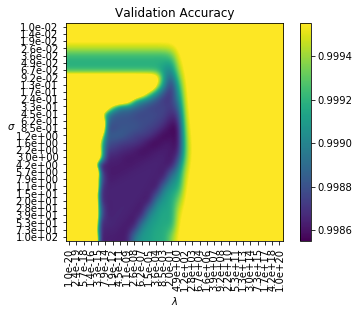

In [5]:
# initialize the parameter candidates
fig, ax = plt.subplots()

# plot the colormap
aux_score_grid = score_grid**0.001
cax = ax.imshow(aux_score_grid, interpolation='bicubic', 
                origin='upper',
                vmin = aux_score_grid.min(), vmax = aux_score_grid.min()*1.001)

# # plot the minimum values
# plt.plot(best_sigma_idx, best_lam_idx,
#          color='red', marker='+', markersize=15)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)

# def format_ticks(value, tick_number):
    

fmt_sigma = ['%1.1e' % i for i in sigma_candidates.tolist()]
fmt_lam = ['%1.1e' % i for i in lam_candidates.tolist()]

ax.set_xlabel(r'$\lambda$')
ax.set_xticks(np.arange(len(fmt_lam)))
ax.set_xticklabels(fmt_lam, rotation=90)

ax.set_ylabel(r'$\sigma$', rotation=0)
ax.set_yticks(np.arange(len(fmt_sigma)))
ax.set_yticklabels(fmt_sigma)

cbar = fig.colorbar(cax)
ax.set_title('Validation Accuracy')
plt.show()

Error Test Set: 0.2774325833066654


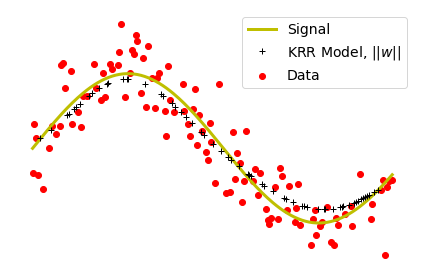

In [6]:
# initialize model
krr_model = KRR(reg='w',
                lam=best_lam,
                sigma=best_sigma)

# fit to data
krr_model.fit(x['train'], y['train'])

# predict
y_pred = krr_model.predict(x['test'])

print('Error Test Set: {}'.format(mean_absolute_error(y['test'], y_pred)))

fig, ax = plt.subplots()

# plot the signal
ax.plot(x['data'], x['signal'], color='y', linewidth=3, label='Signal')

# plot kernel model
ax.plot(x['test'], y_pred, 'k+', linewidth=3, label=r'KRR Model, $||w||$')

# plot data
ax.scatter(x['train'], y['train'], color='r', label='Data')

ax.tick_params(
    axis='both',
    which='both',
    bottom='off',
    left='off',
    top='off',
    labelbottom='off',
    labelleft='off')

# get rid of frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.legend(fontsize=14)
plt.tight_layout()

plt.show()

## Kernel Ridge Regression ($\partial f$)

In [10]:
# initialize the parameter candidates
sigma_candidates = np.logspace(-2, 2, num=10)
lam_candidates = np.hstack((np.logspace(-20, 10, num=10)))

from sklearn.model_selection import KFold, train_test_split

# initialize grid
score_grid = np.empty(shape=(len(sigma_candidates), len(lam_candidates)))

print('Shape of grid: {}'.format(score_grid.shape))
print('Number of sigmas: {}'.format(score_grid.shape[0]))
print('Number of lambdas: {}'.format(score_grid.shape[1]))
min_score = np.inf

# loop through sigma values
for (i, isigma) in enumerate(sigma_candidates):
    
    # loop through lambda values
    for (j, ilam) in enumerate(lam_candidates):
        
        # initialize model
        krr_model = KRR(reg='df',
                        lam=ilam,
                        sigma=isigma,
                        rbf_solver='cy')
        
        # fit to data
        krr_model.fit(x['train'], y['train'])

        # predict
        y_pred = krr_model.predict(x['validation'])

        # save the score
        score_grid[i, j] = mean_absolute_error(y['validation'], y_pred)
        
        # save best score
        if score_grid[i, j] < min_score:
            
            print(min_score)
            min_score = score_grid[i, j]
            best_lam_idx = j
            best_sigma_idx = i
            best_lam = ilam
            best_sigma = isigma




# normalize score grid
score_grid = score_grid

print('Minimum Score: {}'.format(min_score))
print('Best Lambda: {}'.format(best_lam))
print('Best Sigma: {}'.format(best_sigma))
print('Best Lambda Index: {}'.format(best_lam_idx))
print('Best Sigma Index: {}'.format(best_sigma_idx))

print('\n {}'.format(sigma_candidates))
print('\n {}'.format(lam_candidates))

print('\n {}'.format(score_grid[:,:]))
print('\n {}'.format(score_grid[:,best_lam_idx]))
print('\n {}'.format(score_grid[best_sigma_idx,:]))
print('\n {}'.format(score_grid[best_sigma_idx,best_lam_idx]))

Shape of grid: (10, 10)
Number of sigmas: 10
Number of lambdas: 10
inf
0.677870594653


LinAlgError: Singular matrix

In [9]:
# normalize score grid
score_grid = score_grid/score_grid.max()

print('Score Grid: \n{}\n'.format(score_grid))

# minimum mae
min_mae = np.min(score_grid)

print('Minimum Error: \n{}\n'.format(min_mae))

# find values with minimum score
ibest_sigma, ibest_lambda = np.where(min_mae == score_grid)

print('ith Sigma: \n{}\n'.format(ibest_sigma))
print('jth Lambda: \n{}\n'.format(ibest_lambda))

# get best sigma and lambdas
best_sigma = sigma_candidates[ibest_sigma]
best_lambda = lam_candidates[ibest_lambda]

print('Best Sigma: \n{}\n'.format(best_sigma))
print('Best Lambda: \n{}\n'.format(best_lambda))

# # maximum mae
# max_mae = np.max(score_grid)

# print('Maximum Error: \n{}\n'.format(max_mae))

# # find values with minimum score
# iworst_sigma, iworst_lambda = np.where(max_mae == score_grid)

# print('ith Sigma: \n{}\n'.format(iworst_sigma))
# print('jth Lambda: \n{}\n'.format(iworst_lambda))

# # get best sigma and lambdas
# worst_sigma = sigma_candidates[iworst_sigma]
# worst_lambda = lam_candidates[iworst_lambda]

# print('Worst Sigma: \n{}\n'.format(worst_sigma))
# print('Worst Lambda: \n{}\n'.format(worst_lambda))

Score Grid: 
[[ 0.38286021  0.38286021  0.38286021  0.38286021  0.38286021  0.38286021
   0.38286023  0.3828603   0.3828603   0.3828603 ]
 [ 0.30984076  0.30984076  0.30984076  0.30984094  0.31017605  0.31178599
   0.31179034  0.31179034  0.31179164  0.31347207]
 [ 0.32052974  0.32052974  0.32052974  0.3205293   0.31967787  0.31972648
   0.31975096  0.31973973  0.34509244  0.53918676]
 [ 0.50024233  0.44081669  0.65013308  0.45255889  0.40423973  0.4398687
   0.26548128  0.26885992  0.27090365  0.16054129]
 [ 0.16966536  0.16699493  0.1666637   0.21784601  0.16831165  0.17036337
   0.17070805  0.15989691  0.1652279   0.13573993]
 [ 0.15571561  0.1547491   0.15369872  0.15039845  0.1389744   0.13779511
   0.15002583  0.13795187  0.14357563  0.12920416]
 [ 0.14751942  0.14633274  0.15501681  0.14620847  0.14626679  0.14638215
   0.14722477  0.14707142  0.13532773  1.        ]
 [ 0.14744748  0.14744748  0.14750337  0.14734253  0.14246177  0.14190398
   0.14196856  0.14203257  0.35560124  

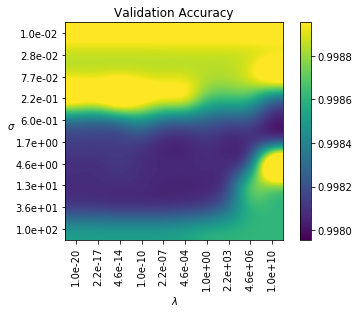

In [10]:
# initialize the parameter candidates
fig, ax = plt.subplots()

# plot the colormap
aux_score_grid = score_grid**0.001
cax = ax.imshow(aux_score_grid, interpolation='bicubic',
                vmin = aux_score_grid.min(), vmax = aux_score_grid.min()*1.001)

# # plot the minimum values
# plt.plot(ibest_lambda, ibest_sigma,
#          color='red', marker='+', markersize=15)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)

# def format_ticks(value, tick_number):
    

fmt_sigma = ['%1.1e' % i for i in sigma_candidates.tolist()]
fmt_lam = ['%1.1e' % i for i in lam_candidates.tolist()]

ax.set_xlabel(r'$\lambda$')
ax.set_xticks(np.arange(len(fmt_lam)))
ax.set_xticklabels(fmt_lam, rotation=90)

ax.set_ylabel(r'$\sigma$', rotation=0)
ax.set_yticks(np.arange(len(fmt_sigma)))
ax.set_yticklabels(fmt_sigma)

cbar = fig.colorbar(cax)
ax.set_title('Validation Accuracy')
plt.show()

In [11]:
# initialize model
krr_model = KRR(reg='df',
                lam=best_lam,
                sigma=best_sigma)

# fit to data
krr_model.fit(x['train'], y['train'])

# predict
y_pred = krr_model.predict(x['test'])

print('Error Test Set: {}'.format(mean_absolute_error(y['test'], y_pred)))

Error Test Set: 0.26718702850752746


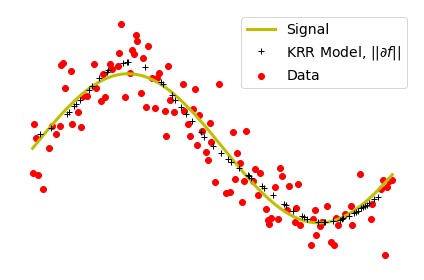

In [12]:
fig, ax = plt.subplots()

# plot the signal
ax.plot(x['data'], x['signal'], color='y', linewidth=3, label='Signal')

# plot kernel model
ax.plot(x['test'], y_pred, 'k+', linewidth=3, label=r'KRR Model, $||\partial f||$')

# plot data
ax.scatter(x['train'], y['train'], color='r', label='Data')

ax.tick_params(
    axis='both',
    which='both',
    bottom='off',
    left='off',
    top='off',
    labelbottom='off',
    labelleft='off')

# get rid of frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.legend(fontsize=14)
plt.tight_layout()

plt.show()

## KRR ($||\partial^2 f||$)

In [13]:
# initialize the parameter candidates
sigma_candidates = np.logspace(-2, 2, num=10)
lam_candidates = np.hstack(([0], np.logspace(-20, 5, num=10)))

from sklearn.model_selection import KFold, train_test_split

# initialize grid
score_grid = np.empty(shape=(len(sigma_candidates), len(lam_candidates)))

print('Shape of grid: {}'.format(score_grid.shape))
print('Number of sigmas: {}'.format(score_grid.shape[0]))
print('Number of lambdas: {}'.format(score_grid.shape[1]))
min_score = 1000

# loop through sigma values
for (i, isigma) in enumerate(sigma_candidates):
    
    # loop through lambda values
    for (j, ilam) in enumerate(lam_candidates):
        
        # initialize model
        krr_model = KRR(reg='d2f',
                        lam=ilam,
                        sigma=isigma)
        
        # fit to data
        krr_model.fit(x['train'], y['train'])

        # predict
        y_pred = krr_model.predict(x['validation'])

        # save the score
        score_grid[i, j] = mean_absolute_error(y['validation'], y_pred)
        
        # save best score
        if score_grid[i, j] < min_score:
            
            min_score = score_grid[i, j]
            best_lam_idx = j
            best_sigma_idx = i
            best_lam = ilam
            best_sigma = isigma




# normalize score grid
score_grid = score_grid

print('Minimum Score: {}'.format(min_score))
print('Best Lambda: {}'.format(best_lam))
print('Best Sigma: {}'.format(best_sigma))
print('Best Lambda Index: {}'.format(best_lam_idx))
print('Best Sigma Index: {}'.format(best_sigma_idx))

# print('\n {}'.format(sigma_candidates))
# print('\n {}'.format(lam_candidates))

# print('\n {}'.format(score_grid[:,:]))
# print('\n {}'.format(score_grid[:,best_lam_idx]))
# print('\n {}'.format(score_grid[best_sigma_idx,:]))
# print('\n {}'.format(score_grid[best_sigma_idx,best_lam_idx]))

Shape of grid: (10, 11)
Number of sigmas: 10
Number of lambdas: 11
Minimum Score: 0.23287636136810325
Best Lambda: 100000.0
Best Sigma: 1.6681005372000592
Best Lambda Index: 10
Best Sigma Index: 5


In [14]:
# normalize score grid
score_grid = score_grid/score_grid.max()

print('Score Grid: \n{}\n'.format(score_grid))

# minimum mae
min_mae = np.min(score_grid)

print('Minimum Error: \n{}\n'.format(min_mae))

# find values with minimum score
ibest_sigma, ibest_lambda = np.where(min_mae == score_grid)

print('ith Sigma: \n{}\n'.format(ibest_sigma))
print('jth Lambda: \n{}\n'.format(ibest_lambda))

# get best sigma and lambdas
best_sigma = sigma_candidates[ibest_sigma]
best_lambda = lam_candidates[ibest_lambda]

print('Best Sigma: \n{}\n'.format(best_sigma))
print('Best Lambda: \n{}\n'.format(best_lambda))

# # maximum mae
# max_mae = np.max(score_grid)

# print('Maximum Error: \n{}\n'.format(max_mae))

# # find values with minimum score
# iworst_sigma, iworst_lambda = np.where(max_mae == score_grid)

# print('ith Sigma: \n{}\n'.format(iworst_sigma))
# print('jth Lambda: \n{}\n'.format(iworst_lambda))

# # get best sigma and lambdas
# worst_sigma = sigma_candidates[iworst_sigma]
# worst_lambda = lam_candidates[iworst_lambda]

# print('Worst Sigma: \n{}\n'.format(worst_sigma))
# print('Worst Lambda: \n{}\n'.format(worst_lambda))

Score Grid: 
[[ 0.09371277  0.09371277  0.09371277  0.09371277  0.09371278  0.09371279
   0.09371279  0.09371279  0.09371279  0.09371279  0.09371291]
 [ 0.07583978  0.07583978  0.07583978  0.07583979  0.0758443   0.07624614
   0.07631684  0.07631698  0.07631698  0.07631696  0.07638991]
 [ 0.07845613  0.07845613  0.07845613  0.07845612  0.0784555   0.07813795
   0.07825231  0.07826548  0.07826553  0.07840974  0.56100128]
 [ 0.11630873  0.82338196  0.13090095  0.11633106  1.          0.09954618
   0.15847257  0.73398257  0.05387489  0.04619281  0.04510048]
 [ 0.04132498  0.04157774  0.041607    0.05065504  0.04101589  0.04122395
   0.04343255  0.0412339   0.04078677  0.04159683  0.03891697]
 [ 0.03644581  0.03663601  0.03703698  0.03764024  0.03898247  0.03674144
   0.03369852  0.03373094  0.03375311  0.03277242  0.03219418]
 [ 0.03610836  0.03610836  0.03582092  0.03585217  0.03565757  0.03582513
   0.03576854  0.03577571  0.03581541  0.03599181  0.03603776]
 [ 0.03609075  0.03609075  0

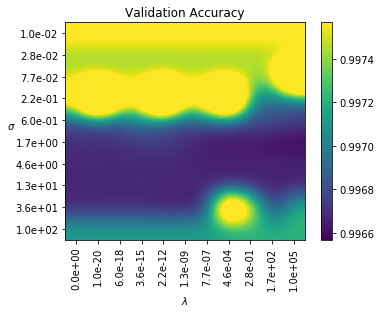

In [15]:
# initialize the parameter candidates
fig, ax = plt.subplots()

# plot the colormap
aux_score_grid = score_grid**0.001
cax = ax.imshow(aux_score_grid, interpolation='bicubic', 
                vmin = aux_score_grid.min(), vmax = aux_score_grid.min()*1.001)

# # plot the minimum values
# plt.plot(ibest_lambda, ibest_sigma,
#          color='red', marker='+', markersize=15)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)

# def format_ticks(value, tick_number):
    

fmt_sigma = ['%1.1e' % i for i in sigma_candidates.tolist()]
fmt_lam = ['%1.1e' % i for i in lam_candidates.tolist()]

ax.set_xlabel(r'$\lambda$')
ax.set_xticks(np.arange(len(fmt_lam)))
ax.set_xticklabels(fmt_lam, rotation=90)

ax.set_ylabel(r'$\sigma$', rotation=0)
ax.set_yticks(np.arange(len(fmt_sigma)))
ax.set_yticklabels(fmt_sigma)

cbar = fig.colorbar(cax)
ax.set_title('Validation Accuracy')
plt.show()

In [16]:
# initialize model
krr_model = KRR(reg='d2f',
                lam=best_lam,
                sigma=best_sigma)

# fit to data
krr_model.fit(x['train'], y['train'])

# predict
y_pred = krr_model.predict(x['test'])

print('Error Test Set: {}'.format(mean_absolute_error(y['test'], y_pred)))

Error Test Set: 0.26420011763432316


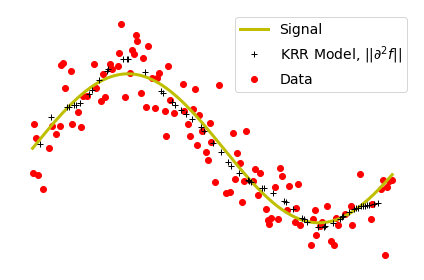

In [17]:
# minimum mae
min_mae = np.min(score_grid)
# print('Score Grid: {}'.format(score_grid))
fig, ax = plt.subplots()

# plot the signal
ax.plot(x['data'], x['signal'], color='y', linewidth=3, label='Signal')

# plot kernel model
ax.plot(x['test'], y_pred, 'k+', linewidth=3, label=r'KRR Model, $||\partial^2 f||$')

# plot data
ax.scatter(x['train'], y['train'], color='r', label='Data')

ax.tick_params(
    axis='both',
    which='both',
    bottom='off',
    left='off',
    top='off',
    labelbottom='off',
    labelleft='off')

# get rid of frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.legend(fontsize=14)
plt.tight_layout()

plt.show()